In [ ]:
# you need to have graphviz installed to visualize dependencies
# usually installed on google colab by default
! sudo apt-get install graphviz -qq
# you also need some latex packages if you want to have standard way of visualizing CCG derivations
# usually not installed by default on google colab, takes a minute or two to install
! sudo DEBIAN_FRONTEND=noninteractive apt-get install texlive-latex-extra dvipng -qq > /dev/null

In [ ]:
! pip install "ccgtools[parser]@git+https://github.com/stanojevic/ccgtools"

In [1]:
import ccg

In [2]:
parser = ccg.parser("pretrained:English-FastText")

In [6]:
tree = parser.parse_sent("This is a parser for natural language.")

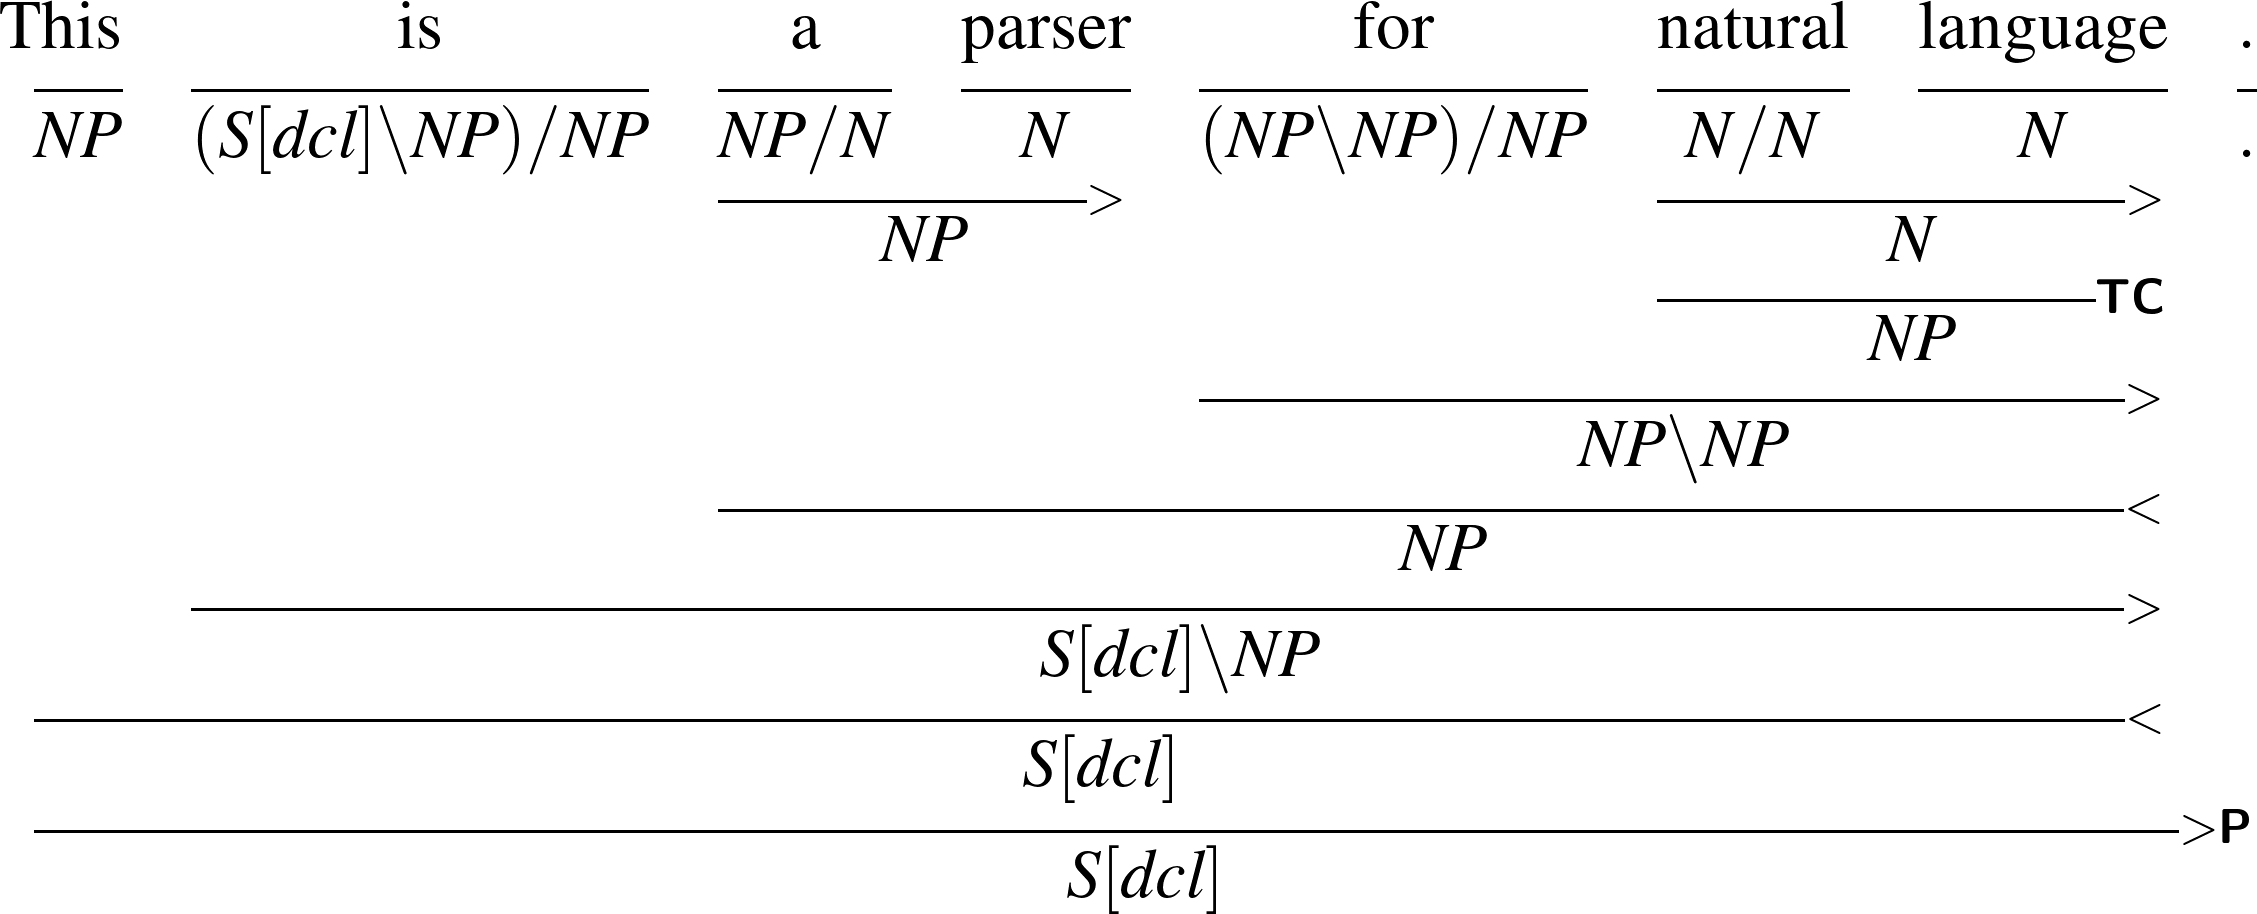

In [7]:
tree

In [5]:
tree.deps()